# VAR/SVAR 模型相關程式

### 簡要Summary

* 編號：v5i2-norm181559

1. 五個變數

2. 認定條件是老師給的：sentiment排在第二個

3. 用normal seed 181559

### 環境設定

In [2]:
# 設定路徑
Path = "/Users/Andy 1/Google 雲端硬碟 (r08323004@g.ntu.edu.tw)/0 Semesters/Thesis/6_VAR_model/R"
setwd(Path)
source("code/VAR_functions.R")           # 讀取 VARsource.R 檔

inv_tol = 1e-20 #求反矩陣時做數值運算允許的最小誤差(避免singular matrix)
inv_tol = 1e-22

─ Attaching packages ──────────────────── tidyverse 1.3.0 ─

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: matrixcalc

Loading required package: lattice

Loading required package: plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘pack

### 讀資料

In [3]:
###### 讀取資料 ######
file = "data/df.csv"
data = read.csv(file = file, header = TRUE)
data = na.omit(data)
# 5-variable model
By <- data %>% select(interest_rate, Sentiment, permit, loan, hp) %>% as.matrix
# 按照老師建議的將情緒指標擺在第二個的identification

### 模型設定

In [4]:
#----- 模型設定 -----#
VAR.P = 2                       # 最大的落後項數
CONST = TRUE                    # 是否有常數項
Y     = VAR.Y(By, VAR.P)        # 設定 Y
X     = VAR.X(By, VAR.P)        # 設定 X

## Reduced Form VAR

In [6]:
###### 參數估計 ######
(Coef.OLS    = VAR.OLS(Y, X, CONST)                  )
(Sigma.OLS   = VAR.Sigma.OLS(Y, X, Coef.OLS, CONST)  )
(Sigma.MLE   = VAR.Sigma.MLE(Y, X, Coef.OLS, CONST))

0.739412234,1.286619e+01,2.635497e-05,1.648116e-06,1.577810e-03,2.058126e-01,-1.377663e+00,2.792548e-06,-1.506708e-06,3.722721e-04,-9.813571e-01
-0.001820585,5.882432e-01,-2.106869e-07,2.186690e-08,4.166464e-05,5.469696e-04,-1.251142e-02,2.605605e-07,-2.506293e-08,-9.221357e-05,2.477925e-02
595.720535604,-3.839239e+03,4.902993e-01,-1.316890e-03,1.059632e+02,-6.910368e+02,-2.212146e+04,3.508182e-01,-4.507767e-04,-1.284330e+02,8.733032e+03
898.569179676,6.875504e+05,-5.236592e+00,1.540331e+00,-9.030762e+02,2.333029e+03,1.081851e+06,4.156090e+00,-5.709024e-01,5.759915e+02,7.362951e+04
-0.720966521,9.472585e+01,1.364316e-05,-2.880466e-06,1.259410e+00,-1.241456e-01,-1.396738e+02,2.538226e-04,3.497889e-06,-2.638097e-01,1.546590e+00


2.094022e-01,3.262498e-04,4.316625e+01,1.714875e+03,-0.02924678
3.262498e-04,2.654587e-05,3.561961e-01,6.189330e+00,0.00860039
4.316625e+01,3.561961e-01,1.072160e+06,3.025331e+06,1115.41428751
1.714875e+03,6.189330e+00,3.025331e+06,6.159158e+08,35.46975261
-2.924678e-02,8.600390e-03,1.115414e+03,3.546975e+01,12.95967973


1.897148e-01,2.955767e-04,3.910788e+01,1.553647e+03,-2.649708e-02
2.955767e-04,2.405011e-05,3.227076e-01,5.607427e+00,7.791807e-03
3.910788e+01,3.227076e-01,9.713584e+05,2.740899e+06,1.010546e+03
1.553647e+03,5.607427e+00,2.740899e+06,5.580092e+08,3.213499e+01
-2.649708e-02,7.791807e-03,1.010546e+03,3.213499e+01,1.174125e+01


### AIC/SIC

In [7]:
#----- 資訊準則 -----#
A0.Mat = matrix(1, 3, 7)
(SIC = VAR.IC(Sigma.MLE, A0.Mat, T)$SIC              )

(IC = VAR.Select(By, Max.lag = 4, CONST)             )
apply(IC, 1, which.min)

[1] 23.66979

AIC,25.54529,24.60996,24.73958,24.67272
SIC,26.24971,25.90842,26.63861,27.17897
HQ,25.83131,25.13712,25.51048,25.69000


AIC SIC  HQ 
  2   2   2

# SVAR

## Identification

$$
\left[
\begin{array}{c}
	\varepsilon_t^i\\
    \varepsilon_t^{sentiment}\\
	\varepsilon_t^{permit}\\
	\varepsilon_t^{loan}\\
	\varepsilon_t^{hp}
\end{array}
\right]
=
\left[
\begin{array}{ccccc}
a_{11} &0 &0 &0 &0\\
a_{21} &a_{22} &0 &0 &0\\
a_{31} &a_{32} &a_{33} &0 &0\\
a_{41} &a_{42} &0 &a_{44} &a_{45}\\
a_{51} &a_{52} &a_{53} &a_{54} &a_{55}
\end{array}
\right]
\left[
\begin{array}{c}
	e_t^{mp}\\
    e_t^{expectation}\\
	e_t^{hs}\\
	e_t^{hd}\\
	e_t^{sp}
\end{array}
\right]
$$

In [8]:
### 5-variable model
# 如果不是Wold遞迴式 -> 自定義
Amat = diag(5)
Amat[2,1]  = NA;
Amat[3,1]  = NA; Amat[3,2]  = NA;
Amat[4,1]  = NA; Amat[4,2]  = NA; Amat[4,5]  = NA;
Amat[5,1]  = NA; Amat[5,2]  = NA; Amat[5,3]  = NA; Amat[5,4]  = NA;

Bmat = diag(5)
diag(Bmat) = NA

Amat;Bmat

1,0,0,0,0
NA,1,0,0,0
NA,NA,1,0,0
NA,NA,0,1,NA
NA,NA,NA,NA,1


NA,0,0,0,0
0,NA,0,0,0
0,0,NA,0,0
0,0,0,NA,0
0,0,0,0,NA


## 估計 $\hat{A} , \hat{B}$

### 1. 找起始值

為了得到合理的估計，在設定完認定條件後，依以下步驟蒐集seeds:

1. 給定一個seed，估 $\hat{A} , \hat{B}$ ，從normal或uniform隨機assign起始值

2. 如果 $se(\hat{A}), se(\hat{B})$ 存在，進入下一步，若否則回到第一步

3. 如果標準誤都小於2500，則存下這個seed

4. 直到存的seed總數大於100則迴圈終止

```R
### Brutal Force
seed_stored <- c()
i <- 162150
while(TRUE){
  set.seed(i)
  SVAR_AB_est <- try(VAR.svarest.AB(By, VAR.P, Amat, Bmat, CONST, start = "normal"), 
                     silent = TRUE)
  A0.Std <- try(SVAR_AB_est$A0.Std)
  B0.Std <- try(SVAR_AB_est$B0.Std)
  if(sum(is.na(A0.Std))==0 && sum(is.na(B0.Std))==0){
    if(max(A0.Std)<=2500 && max(B0.Std)<=2500){
      seed_stored <- rbind(seed_stored, i)
      cat("Seed: ", i, " found\n")
      write.csv(seed_stored, "seed_v5_identification2_Std2500.csv")
    }
  }
  i <- i+1
  if(length(seed_stored)>=3000){
    break
  }
  cat("Now in teration: ", i, "\n",
      "There are ", length(seed_stored), " seeds found", "\n")
}
```

### 2. 比標準誤大小

以下的程式可以從上面存下的seeds中計算出每個seed對應的 $\hat{A}, \hat{B}$ 的標準誤大小

```R
# 上面找到的seeds
seeds <- read_csv("seeds/v5_identification2/seed_AB_std_smaller1500_identification_sent2th_runif.csv")$V1

# 製作表
df_seeds <- matrix(NA, nrow = length(seeds), ncol = 3)
counter <- 1
for(seed in seeds){
  set.seed(seed)
  SVAR_AB_est <- VAR.svarest.AB(By, VAR.P, Amat, Bmat, CONST, start = "normal")
  A0 <- SVAR_AB_est$A0.svar
  B0 <- SVAR_AB_est$B0.svar
  A0.Std <- SVAR_AB_est$A0.Std
  B0.Std <- SVAR_AB_est$B0.Std
  df_seeds[counter,1] <- seed
  df_seeds[counter,2] <- max(A0.Std)
  df_seeds[counter,3] <- max(B0.Std)
  counter <- counter+1
}
df_seeds <- as.data.frame(df_seeds)
colnames(df_seeds) <- c("seed", "A0.Std.Max", "B0.Std.Max")

print(df_seeds %>% arrange(A0.Std.Max))
```

### 3. 從變異數分解看Possible Seed

但標準誤小不見得就可以有好的估計的結果

下面的程式可以從已存下的seeds一個個輸出變異數分解的結果至一個純文字檔中

```R
# 看變異數分解
for(seed in seed_stored){
  set.seed(seed)
  SVAR_AB_est <- VAR.svarest.AB(By, VAR.P, Amat, Bmat, CONST, start = "normal")
  SVAR_AB_IRF <- VAR.svarirf.AB(By, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est)
  SVAR_AB_VarDecomp <- VAR.svardecomp.AB(m = 5, By, VAR.P,
                                         AMat, BMat, h=119,
                                         Const=TRUE, ddTheta = SVAR_AB_IRF)
  cat("Now in seed: ", file = "output.txt",append = T);
  cat(seed, file = "output.txt", append = T)
  cat("\n\n", file = "output.txt", append = T)
  cat(SVAR_AB_VarDecomp*100, file = "output.txt", append = T)
  cat("\n\n", file = "output.txt", append = T)
}
```

# 找到的seed

從normal(0,1)抽出的好的seed:

175366, 181559

In [10]:
set.seed(175366)
rnorm(15)

[1] -0.35629783 -0.11185045 -0.13178357 -1.62338903 -0.42328429 -1.25262497
 [7]  0.83932669 -0.41178510 -1.78538561 -0.44987514  0.09213794  1.13200678
[13]  1.18020953 -0.61435168 -1.03669643

In [11]:
set.seed(181559)
rnorm(15)

[1] -0.3752681  1.1966139 -0.8494014 -0.1049917 -1.4367628 -0.7364365
 [7]  0.4783460  0.6192159  0.4689445 -0.7537429 -0.1743853  0.1232136
[13] -0.2509900 -0.5982678  0.9983071

In [12]:
set.seed(181559)
SVAR_AB_est <- VAR.svarest.AB(By, VAR.P, Amat, Bmat, CONST, start = "normal")
A0 <- SVAR_AB_est$A0.svar
B0 <- SVAR_AB_est$B0.svar
A0.Std <- SVAR_AB_est$A0.Std
B0.Std <- SVAR_AB_est$B0.Std

## A, B Matrix

In [14]:
A0; B0
A0.Std; B0.Std

1.000000000,0.0000000,0.000,0.00000,0.00
-0.001541703,1.0000000,0.000,0.00000,0.00
-27.004867922,-0.5950595,1.000,0.00000,0.00
-0.708392820,-0.3762619,0.000,1.00000,-34039.81
-0.777877467,-0.3733063,-477.782,29.72705,1.00


0.4576825,0.00000000,0.000,0.0,0.0
0.0000000,0.00523293,0.000,0.0,0.0
0.0000000,0.00000000,1240.526,0.0,0.0
0.0000000,0.00000000,0.000,125266.7,0.0
0.0000000,0.00000000,0.000,0.0,707956.3


0.000000e+00,0.000,0.00000,0.000000,0.000
1.057212e-03,0.000,0.00000,0.000000,0.000
2.503217e+02,1459.245,0.00000,0.000000,0.000
1.337612e+03,1684.405,0.00000,0.000000,1442.589
1.077481e+03,1084.652,63.37044,1.909577,0.000


0.02992662,0.0000000000,0.0000,0.000,0.0000
0.00000000,0.0002977254,0.0000,0.000,0.0000
0.00000000,0.0000000000,110.7303,0.000,0.0000
0.00000000,0.0000000000,0.0000,1755.348,0.0000
0.00000000,0.0000000000,0.0000,0.000,734.5837


## IRF (without Bootstrap C.I.)

In [16]:
### IRF
SVAR_AB_IRF <- VAR.svarirf.AB(By, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est)


# 5*5個圖的time series
df_IRF_plot <- matrix(NA, 120, 25) #%>% as.tibble()
#dim(df_IRF_plot)
h <- 0 # h表示第幾期的IRF
for(period in SVAR_AB_IRF){
  k <- 0 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
  h <- h+1 # h表示第幾期的IRF
  for(j in 1:5){
    for(i in 1:5){
      k <- k+1 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
      df_IRF_plot[h,k] <- period[i,j]
    }
  }
}
df_IRF_plot <- df_IRF_plot %>% as_tibble()

Warning message:
“The `x` argument of `as_tibble.matrix()` must have unique column names if `.name_repair` is omitted as of tibble 2.0.0.
Using compatibility `.name_repair`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


In [17]:
p1 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V1))
p2 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V2))
p3 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V3))
p4 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V4))
p5 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V5))
p6 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V6))
p7 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V7))
p8 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V8))
p9 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V9))
p10 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V10))
p11 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V11))
p12 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V12))
p13 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V13))
p14 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V14))
p15 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V15))
p16 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V16))
p17 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V17))
p18 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V18))
p19 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V19))
p20 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V20))
p21 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V21))
p22 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V22))
p23 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V23))
p24 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V24))
p25 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V25))

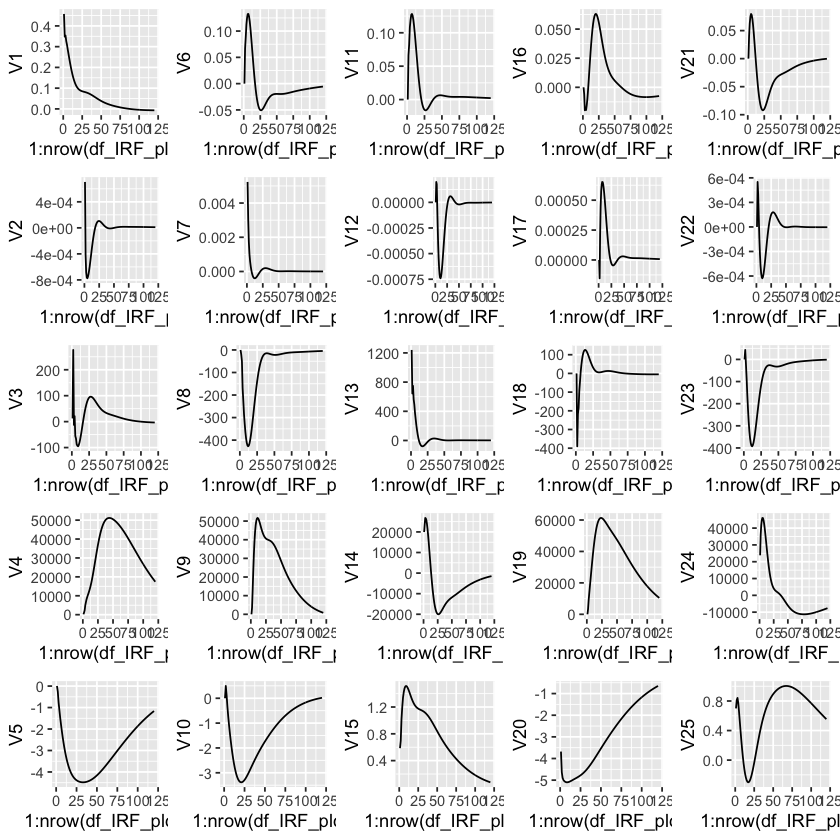

In [18]:
multiplot(p1,p2,p3,p4,p5,
          p6,p7,p8,p9,p10,
          p11,p12,p13,p14,p15,
          p16,p17,p18,p19,p20,
          p21,p22,p23,p24,p25,
          cols = 5)

```R
# For shock 1
multiplot(p1,p2,p3,p4,p5,
          cols = 2)
# For shock 2
multiplot(p6,p7,p8,p9,p10,
          cols = 2)
# For shock 3
multiplot(p11,p12,p13,p14,p15,
          cols = 2)
# For shock 4
multiplot(p16,p17,p18,p19,p20,
          cols = 2)
# For shock 5
multiplot(p21,p22,p23,p24,p25,
          cols = 2)
```

## IRF (Bootstrap C.I.)

Steps:

1. 從殘差取後放回重抽T個

2. 從估計值加上重抽的T個殘差，得到5條 period為T的pseudo time series

3. 從pseudo time series再估SVAR及IRF

    a. 估的時候是固定已經得到的 $\hat{A}, \hat{B}$ matrix來計算IRF
    
    b. 估的條件相似，是當重抽一組residual並得到pseudo time series後，一樣要 $se(\hat{A}), se(\hat{B})$ 存在才算進一個bootstrap statistics
    
    c. 停止條件是蒐集到1000條

4. 從IRF的2.5% quantile跟97.5%quantile找到IRF的95% C.I.

存法：用arrary：

1. row數為總期間減去lag期數

2. column數為變數總數的平方（shock1對y1,..., shock5對y5）

3. page數為Bootstrap重複的次數

```R
lower = 0.025                                        # 控制成 95% CI
upper = 1-lower
kk = ncol(By)
ddY = VAR.ddY(By, VAR.P)
ddX = VAR.ddX(By, VAR.P)
# obs:119 lag:2 -> 117
# Y: 5 vairables
# X: 5個變數的t-1, t-2 -> 10 variables
dim(ddY); dim(ddX)

T   = nrow(ddY)
T.total= nrow(By)
Ik  = diag(rep(1, kk))
# 55 coef.
Coef = t(VAR.EbyE(ddY, ddX, CONST)$ddA)              # Step 1 估計模型
# residuals
U    = VAR.EbyE(ddY, ddX, CONST)$ddU

#BSigma.u = VAR.ddSigma.OLS(ddY, ddX, CONST)
if(CONST == TRUE){
  const = Coef[, ncol(Coef)]
  Coef.noc= Coef[,-ncol(Coef)]                      # 刪掉 const
}else{
  const = matrix(0, kk, 1)
  Coef.noc = Coef
}
dm.U <- U-mean(U)
#dm.U = scale(U, scale = FALSE)                       # Step 2 減去殘差的平均數
N = 1000 #重抽次數
dim(ddX); dim(Coef.noc); dim(dm.U)
#Y.sim <- matrix(const, nrow = 117, ncol = 5, byrow = T) + ddX %*% t(Coef.noc) + dm.U

# 存N次重抽的IRF
df_IRF.sim <- array(NA, c(120,25,N)) #dimensions are: Time Period, Number of shock interacts with variables, page (number of Bootstrap resamplings)
counter <- 1
while(TRUE){
  rm(Y.sim); rm(SVAR_AB_est.sim)
  cat("Now, there are ", counter-1, " sets of resamples.\n")
  Y.sim = matrix(0, nrow = T.total, ncol = kk)          # Y.sim = 0 #pseudo time series
  Y.sim[c(1:VAR.P),] = By[c(1:VAR.P), ]
  boot.number = sample(c(1:T), replace = TRUE)      # Step 3 取出放回
  U.sim = dm.U[boot.number,]
  
  Y.sim[-c(1:VAR.P),] <- matrix(const, nrow = 117, ncol = 5, byrow = T) + ddX %*% t(Coef.noc) + U.sim
  #`Y.sim` is the pseudo time series
  # Step 5 重新估算SVAR
  
  ### SVAR.sim Start ###
  SVAR_AB_est.sim <- try(VAR.svarest.AB(Y.sim, VAR.P, Amat, Bmat, CONST, start = "normal"), silent = T)
  if(class(SVAR_AB_est.sim)=="try-error"){
    print(Y.sim[length(Y.sim)])
    print(U.sim[length(U.sim)])
    print("Bad Trial")
    next
  }
  A0.Std.sim <- try(SVAR_AB_est.sim$A0.Std, silent = T)
  B0.Std.sim <- try(SVAR_AB_est.sim$B0.Std, silent = T)
  cat(class(A0.Std.sim), "\t", class(B0.Std.sim), "\n")
  
  if(class(A0.Std.sim)=="try-error" | class(B0.Std.sim)=="try-error" ){
    cat("This iteration turns out a bad result. Try next.\n")
    next
  }
  
  if(sum(is.na(A0.Std.sim))==0 && sum(is.na(B0.Std.sim))==0){
    #IRF
    SVAR_AB_IRF.sim <- VAR.svarirf.AB(Y.sim, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est)#.sim)
    cat("This iteration turns out a proper result. \n
        Estimate its IRF and save.\n")
  }else{
    next
  }
  # SVAR_AB_IRF.sim <- VAR.svarirf.AB(Y.sim, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est.sim)
  # cat("This iteration turns out a proper result. \n
  #     Estimate its IRF and save.\n")
  
  # 5*5個圖的time series
  df_IRF_plot.sim <- matrix(NA, 120, 25) #%>% as.tibble()
  # df_IRF.sim <- array(1:(120*25*N), c(120,25,N))
  # df_IRF.sim[2,1,1] # slicing
  
  h <- 0 # h表示第幾期的IRF
  for(period in SVAR_AB_IRF.sim){
    k <- 0 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
    h <- h+1 # h表示第幾期的IRF
    for(j in 1:5){
      for(i in 1:5){
        k <- k+1 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
        df_IRF_plot.sim[h,k] <- period[i,j]
      }
    }
  }
  # 把這一次重抽得到的IRF append進`df_IRF.sim`中
  df_IRF.sim[,,counter] <- df_IRF_plot.sim
  ### SVAR.sim Ends ###
  if(counter>=N){
    break
  }
  counter <- counter+1
}
```

In [ ]:
# Save
#saveRDS(df_IRF.sim, file = "df_IRF.sim.rds")

In [20]:
df_IRF.sim <- read_rds("/Users/Andy 1/Google 雲端硬碟 (r08323004@g.ntu.edu.tw)/0 Semesters/Thesis/6_VAR_model/R/seeds/v5_identification2/df_IRF.sim.rds")

In [22]:
# 看某一頁
head(df_IRF.sim[,,1000])

0.4576825,0.0007056106,12.36008,198.6666,0.005826769,-4.302720e-20,5.232930e-03,0.003113905,5.011327e-02,1.414353e-06,⋯,3.316242e-14,5.112661e-17,8.955773e-13,0.123793,-3.680002,-1.218243e-14,-1.878169e-17,-3.289961e-13,23815.20,0.69962779
0.3079387,-0.0004985785,204.21108,-3628.2256,-0.044234917,1.259268e-01,1.610998e-03,112.848397101,1.299685e+04,-7.634367e-01,⋯,1.410049e-02,3.134617e-04,-4.708740e+01,3697.254602,-2.766700,2.453213e-02,1.682432e-04,-1.703598e+02,24793.83,0.04820757
0.2968611,-0.0008571134,31.57373,1919.1910,-0.581611784,3.782972e-02,4.910762e-04,76.962996386,1.854259e+04,-1.077152e+00,⋯,1.106175e-02,3.074970e-04,7.090317e+01,4031.694806,-3.002726,2.568314e-02,-1.234192e-04,-1.410091e+02,24425.29,0.11636025
0.2773263,-0.0007280480,14.23369,3117.4452,-0.826885091,5.280348e-02,1.251991e-04,9.040808946,2.288869e+04,-1.335432e+00,⋯,9.736648e-03,2.938165e-04,7.530251e+01,6133.094239,-2.946553,1.354982e-02,-2.700697e-04,-1.795159e+02,23833.55,-0.00162058
0.2607150,-0.0007261120,-28.48270,4470.5265,-1.105260098,4.722447e-02,-6.874541e-07,-0.934099107,2.370220e+04,-1.387834e+00,⋯,1.178693e-02,3.153397e-04,1.213785e+02,7647.471959,-2.944044,9.018791e-03,-2.886370e-04,-1.966403e+02,22901.71,-0.04449020
0.2413399,-0.0006821911,-47.63982,5572.3245,-1.352446146,4.527686e-02,-9.918455e-05,-21.484848809,2.422957e+04,-1.443989e+00,⋯,1.420166e-02,3.115215e-04,1.417870e+02,9318.928721,-2.914469,2.857419e-03,-2.856483e-04,-2.098201e+02,21672.75,-0.08665939


### 畫IRF & Bootstrap C.I.

In [23]:
df_IRF_plot.BS.L <- matrix(NA, 120, 25)
df_IRF_plot.BS.U <- matrix(NA, 120, 25)
df_IRF_plot.BS.Median <- matrix(NA, 120, 25)
df_IRF_plot.BS.Mean <- matrix(NA, 120, 25)
for(col in 1:25){
  for(row in 1:120){
    df_IRF_plot.BS.L[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.025)
    df_IRF_plot.BS.U[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.975)
    df_IRF_plot.BS.Median[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.5)
    df_IRF_plot.BS.Mean[row,col] <- mean(df_IRF.sim[row,col,])
  }
}

df_IRF_plot.BS.L <- df_IRF_plot.BS.L %>% as_tibble()
df_IRF_plot.BS.U <- df_IRF_plot.BS.U %>% as_tibble()
df_IRF_plot.BS.Median <- df_IRF_plot.BS.Median %>% as_tibble()
df_IRF_plot.BS.Mean <- df_IRF_plot.BS.Mean %>% as_tibble()

```R
##### Plot #####

shock1y1 <- bind_cols(df_IRF_plot.BS.L$V1, df_IRF_plot.BS.U$V1,
                      df_IRF_plot.BS.Median$V1, df_IRF_plot.BS.Mean$V1, 
                      df_IRF_plot$V1)
colnames(shock1y1) <- c("Lower", "Upper", "Median", "Mean", "IRF")
ggplot(shock1y1) + 
  geom_line(aes(x = 1:nrow(shock1y1), y = Lower), linetype = "dashed")+
  geom_line(aes(x = 1:nrow(shock1y1), y = Upper), linetype = "dashed")+
  geom_line(aes(x = 1:nrow(shock1y1), y = Median), col = "Blue")+
  geom_line(aes(x = 1:nrow(shock1y1), y = Mean), col = "Red")
ggplot(shock1y1) +
  geom_line(aes(x = 1:nrow(shock1y1), y = IRF), col = "Red")+
  geom_line(aes(x = 1:nrow(shock1y1), y = Lower), linetype = "dashed")+
  geom_line(aes(x = 1:nrow(shock1y1), y = Upper), linetype = "dashed")

```

In [24]:
ind <- 0
for(i in 1:5){
  for(j in 1:5){
    ind <- ind+1
    nam <- paste("shock", j, "y", i, sep = '')
    assign(nam, bind_cols(df_IRF_plot.BS.L[ind], df_IRF_plot.BS.U[ind],
                          df_IRF_plot.BS.Median[ind], df_IRF_plot.BS.Mean[ind]))
    # 改名
    evalStr <- paste0("colnames(", nam, ") <- c('Lower', 'Upper', 'Median', 'Mean')")
    eval(parse(text=evalStr))
    # 圖層
    evalStr <- paste0("p", ind, " <- ", "ggplot(",nam,") + geom_line(aes(x = 1:nrow(", nam, "), y = Lower), linetype = 'dashed', col='black')+geom_line(aes(x = 1:nrow(", nam, "), y = Upper), linetype = 'dashed', col='black')+geom_line(aes(x = 1:nrow(", nam, "), y = Mean), col = 'Blue')")
    eval(parse(text=evalStr))
  }
}

New names:
* V1 -> V1...1
* V1 -> V1...2
* V1 -> V1...3
* V1 -> V1...4

New names:
* V2 -> V2...1
* V2 -> V2...2
* V2 -> V2...3
* V2 -> V2...4

New names:
* V3 -> V3...1
* V3 -> V3...2
* V3 -> V3...3
* V3 -> V3...4

New names:
* V4 -> V4...1
* V4 -> V4...2
* V4 -> V4...3
* V4 -> V4...4

New names:
* V5 -> V5...1
* V5 -> V5...2
* V5 -> V5...3
* V5 -> V5...4

New names:
* V6 -> V6...1
* V6 -> V6...2
* V6 -> V6...3
* V6 -> V6...4

New names:
* V7 -> V7...1
* V7 -> V7...2
* V7 -> V7...3
* V7 -> V7...4

New names:
* V8 -> V8...1
* V8 -> V8...2
* V8 -> V8...3
* V8 -> V8...4

New names:
* V9 -> V9...1
* V9 -> V9...2
* V9 -> V9...3
* V9 -> V9...4

New names:
* V10 -> V10...1
* V10 -> V10...2
* V10 -> V10...3
* V10 -> V10...4

New names:
* V11 -> V11...1
* V11 -> V11...2
* V11 -> V11...3
* V11 -> V11...4

New names:
* V12 -> V12...1
* V12 -> V12...2
* V12 -> V12...3
* V12 -> V12...4

New names:
* V13 -> V13...1
* V13 -> V13...2
* V13 -> V13...3
* V13 -> V13...4

New names:
* V14 -> V14...1
* V1

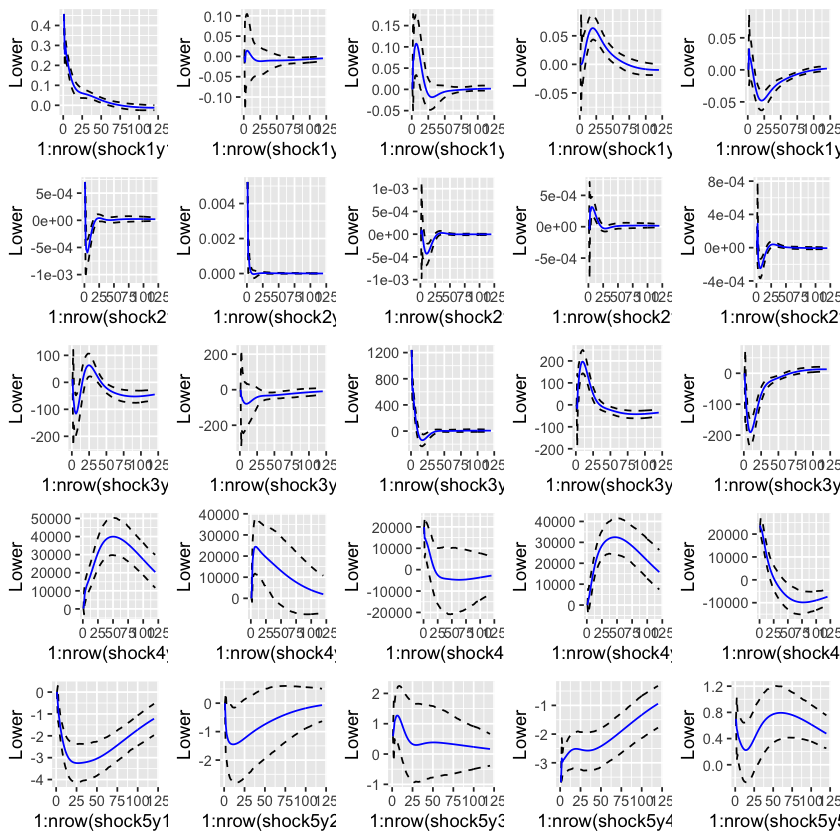

In [25]:
# p1
# p2
# p3
# p4
# p5
# p6
# p7
# p8
# p9
# p10
# p11
# p12
# p13
# p14
# p15
# p16
# p17
# p18
# p19
# p20
# p21
# p22
# p23
# p24
# p25

multiplot(p1,p2,p3,p4,p5,
          p6,p7,p8,p9,p10,
          p11,p12,p13,p14,p15,
          p16,p17,p18,p19,p20,
          p21,p22,p23,p24,p25,
          cols = 5)

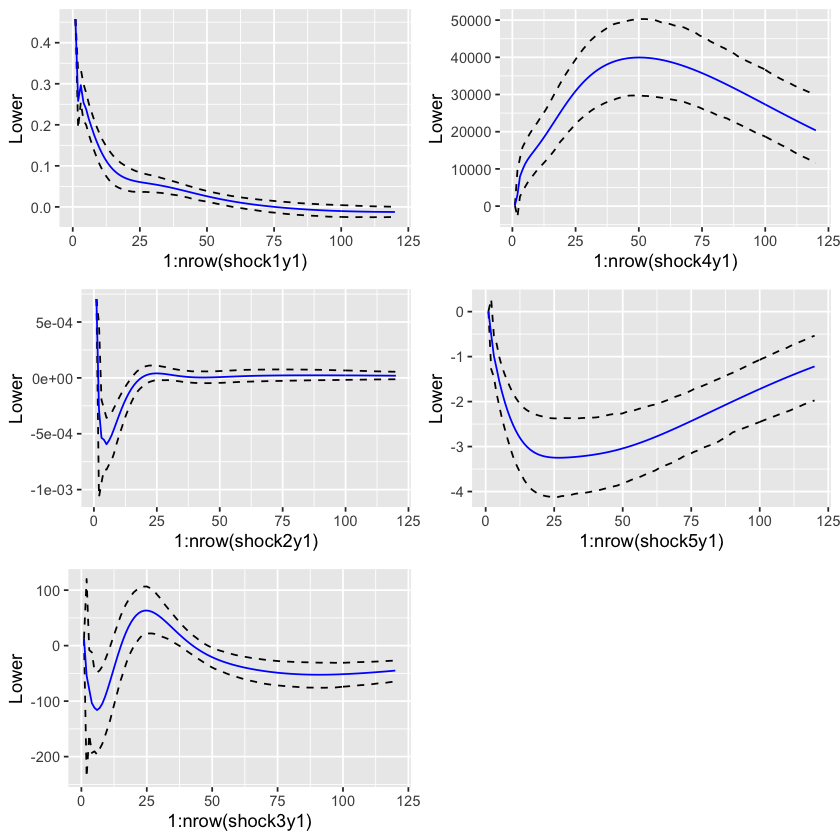

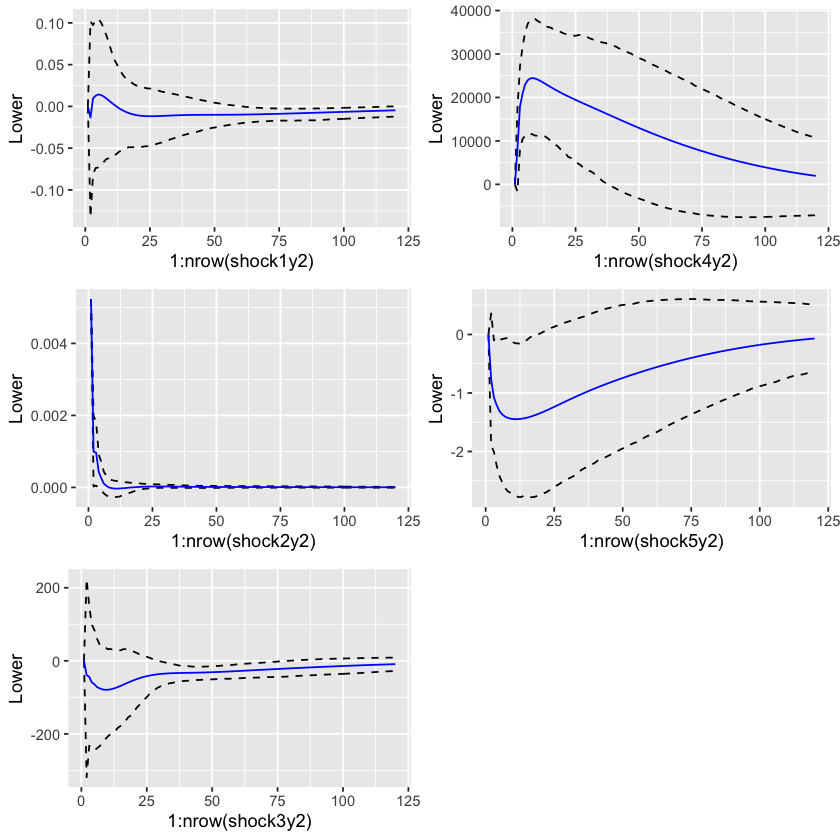

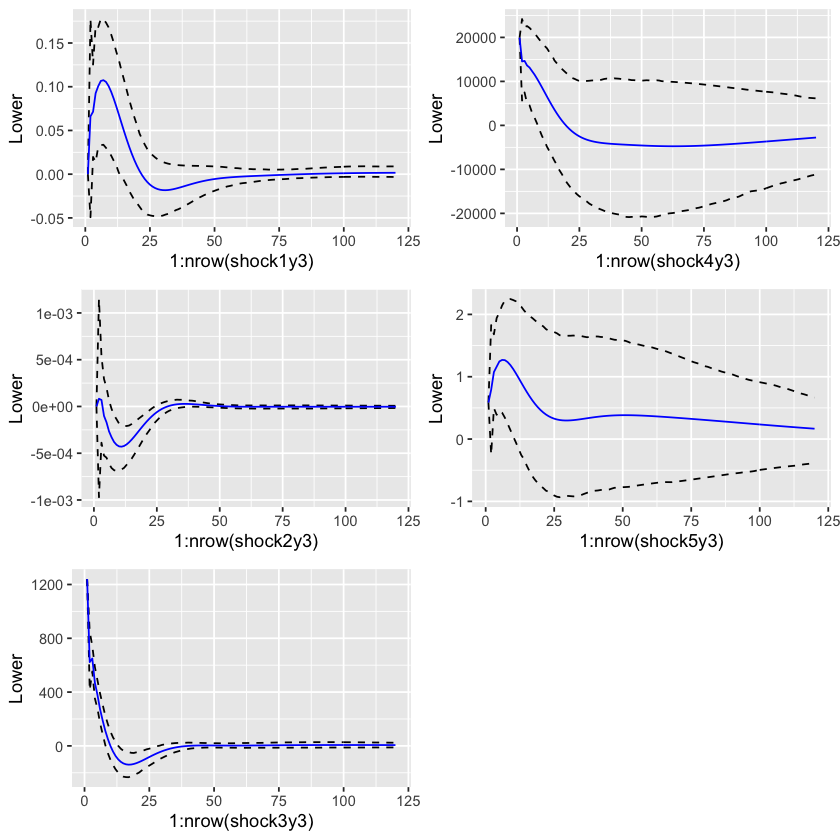

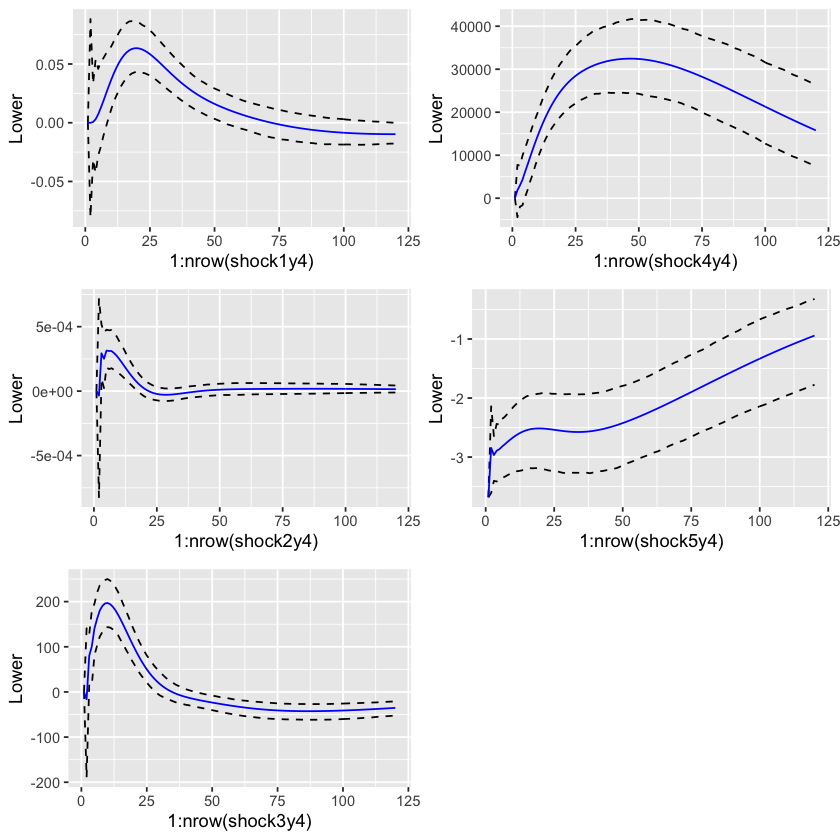

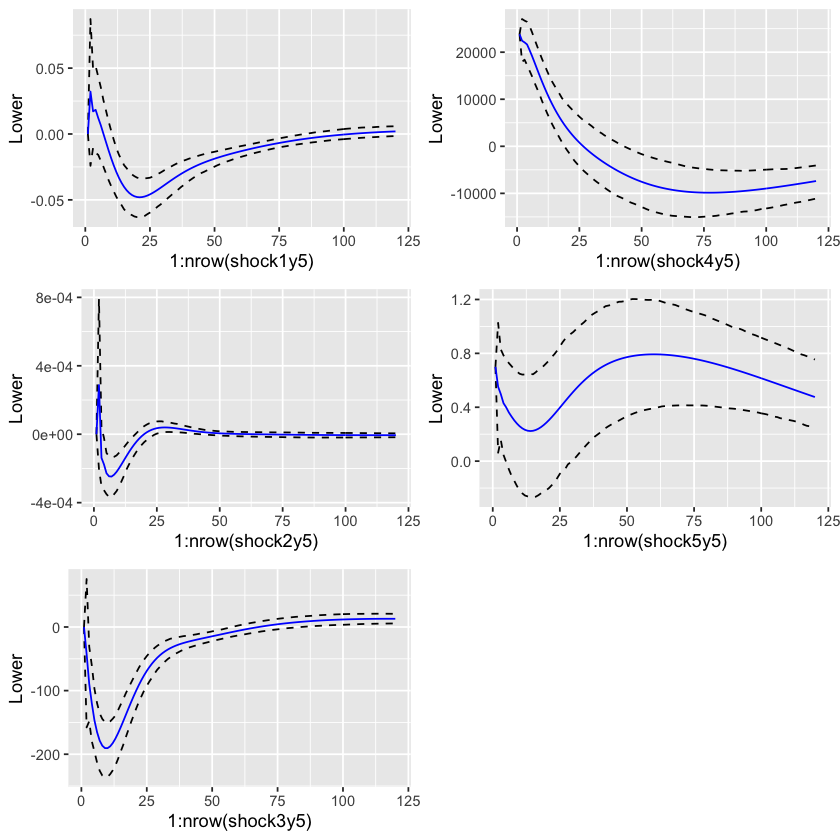

In [27]:
# For shock 1
multiplot(p1,p2,p3,p4,p5,
          cols = 2)
# For shock 2
multiplot(p6,p7,p8,p9,p10,
          cols = 2)
# For shock 3
multiplot(p11,p12,p13,p14,p15,
          cols = 2)
# For shock 4
multiplot(p16,p17,p18,p19,p20,
          cols = 2)
# For shock 5
multiplot(p21,p22,p23,p24,p25,
          cols = 2)

## Variance Decomposition

In [29]:
# `ddTheta` 放已經估出來的IRF (至於要放怎樣穩定的還要再想)
# m表示對於第幾個變數的變異數分解（如第五個是對房價的變異數分解）
SVAR_AB_VarDecomp <- VAR.svardecomp.AB(m = 5, By, VAR.P,
                                       AMat, BMat, h=119,
                                       Const=TRUE, ddTheta = SVAR_AB_IRF)
SVAR_AB_VarDecomp*100

h=1,2.361824e-04,1.391578e-11,2.386625,94.20807,3.4050702
h=2,1.760063e-01,6.585318e-01,2.222097,93.86217,3.0811924
h=3,1.025226e+00,4.113026e-01,2.938770,92.70238,2.9223258
h=4,2.107376e+00,4.111167e-01,3.598539,91.21388,2.6690904
h=5,3.401473e+00,7.520948e-01,4.176473,89.31222,2.3577406
h=6,4.794048e+00,1.353566e+00,4.611866,87.19870,2.0418206
h=7,6.251046e+00,2.138027e+00,4.923380,84.93651,1.7510396
h=8,7.727168e+00,3.050787e+00,5.124021,82.59968,1.4983397
h=9,9.192863e+00,4.046011e+00,5.233987,80.24028,1.2868593
h=10,1.062261e+01,5.085646e+00,5.271285,77.90581,1.1146567
h=11,1.199890e+01,6.137591e+00,5.252954,75.63333,0.9772280


## Historical Decomposition

In [30]:
SVAR_AB_HistDecomp <- VAR.svarhist.AB(By, VAR.P, Amat, Bmat, CONST)
dim(SVAR_AB_HistDecomp)

[1] 119  25

In [33]:
#----- Base Project 估計 -----#
SVAR_AB_Hist.c0 = VAR.baseproject(By, VAR.P, CONST)
head(SVAR_AB_Hist.c0)
dim(SVAR_AB_Hist.c0)
dim(By)

1,7.180000,0.005097271,10465.00,1051038,98.1600
2,8.270000,0.015780528,17129.00,1073968,104.1600
,7.675291,0.014417542,17136.35,1084673,104.2331
,7.431884,0.016005012,17351.92,1131749,103.1554
,7.217294,0.017739689,17559.81,1196077,102.2756
,7.068041,0.019299676,17675.20,1270418,101.6163


[1] 119   5

[1] 119   5

In [35]:
# 實際時間序列與基本預測時間序列之偏離值
head(By-SVAR_AB_Hist.c0)

,interest_rate,Sentiment,permit,loan,hp
1,0.00000000,0.000000000,0.0000,0.00,0.000000
2,0.00000000,0.000000000,0.0000,0.00,0.000000
3,0.09137594,0.001708533,195.6465,26935.89,2.446907
4,-1.40921685,0.002446206,2822.0828,41512.46,6.834601
5,-0.84396048,-0.004591036,1730.1946,34623.49,10.934421
6,0.65062518,-0.001928391,7036.8030,67892.13,16.203727


In [40]:
# 只有特定衝擊下的時間序列與基本預測時間序列之偏離值
## shock1: monetary policy shock
head(SVAR_AB_HistDecomp[,c(1,6,11,16,21)])

NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
0.09137594,0.0001408746,2.467679,39.66362,0.001163309
-1.48266487,-0.0024760849,13.256926,-447.66510,-0.070910798
-1.07444271,0.0013299708,-938.771321,-3360.29871,0.716458825
0.45179228,0.0045378786,110.312480,-6149.23222,2.370075062


In [44]:
##左：baseline上 hp 的變化；右：shock1 對 hp 的衝擊
cbind((By-SVAR_AB_Hist.c0)[,5], 
      (SVAR_AB_HistDecomp[,c(1,6,11,16,21)])[,5])

1,0.000000,NA
2,0.000000,NA
3,2.446907,0.001163309
4,6.834601,-0.070910798
5,10.934421,0.716458825
6,16.203727,2.370075062
7,18.147015,2.609141525
8,18.238022,2.328520990
9,18.590100,3.159094888
10,16.544997,3.693608423
11,24.003994,3.685155130


### 對「房價」的歷史分解：monetary policy shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2

Warning message:
“Removed 2 row(s) containing missing values (geom_path).”


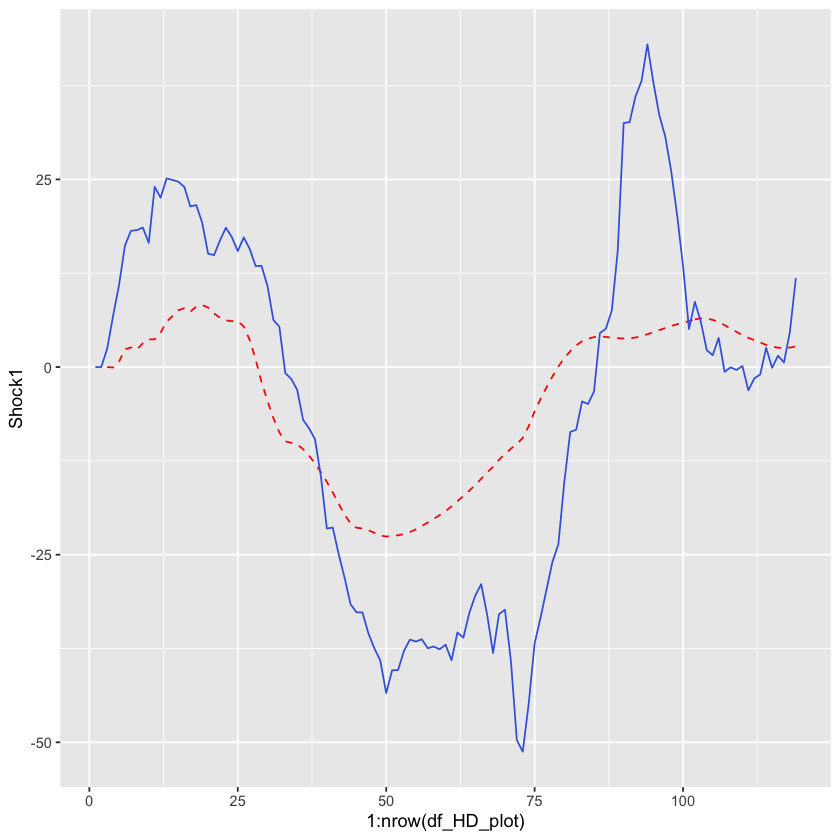

In [45]:
df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(1,6,11,16,21)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock1")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock1), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')


### 對「房價」的歷史分解：housing price expectation shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2

Warning message:
“Removed 2 row(s) containing missing values (geom_path).”


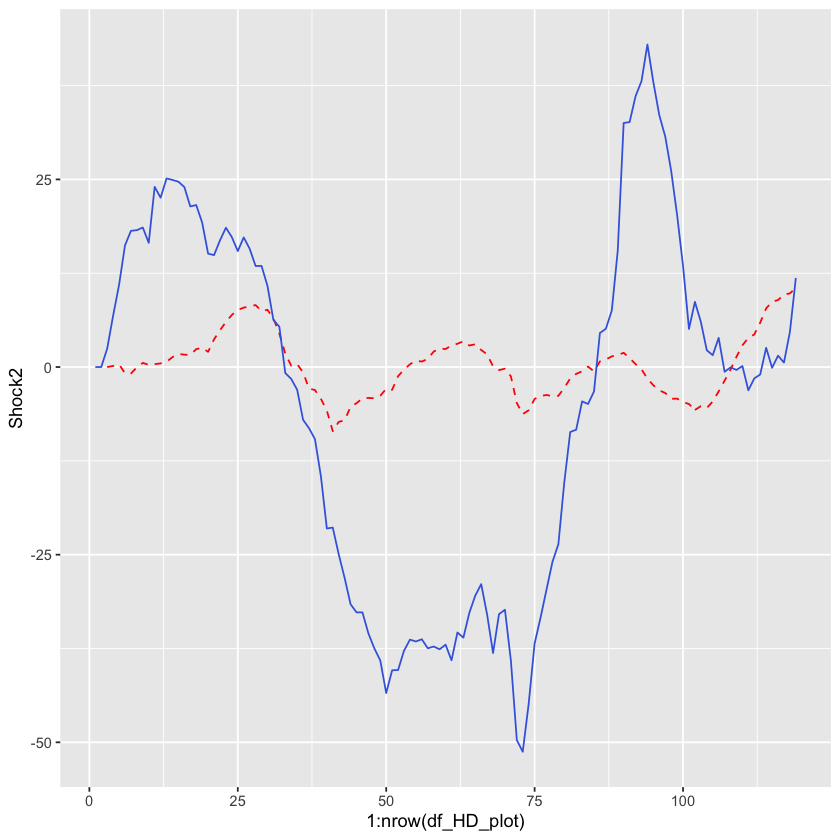

In [49]:
# ## shock2: housing price expectation shock
# SVAR_AB_HistDecomp[,c(2,7,12,17,22)]-SVAR_AB_Hist.c0
# ## baseline上 hp 的變化
# (By-SVAR_AB_Hist.c0)[,5]
# ## shock2 對 hp 的衝擊
# (SVAR_AB_HistDecomp[,c(2,7,12,17,22)])[,5]

df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(2,7,12,17,22)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock2")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock2), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### 對「房價」的歷史分解：supply shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2

Warning message:
“Removed 2 row(s) containing missing values (geom_path).”


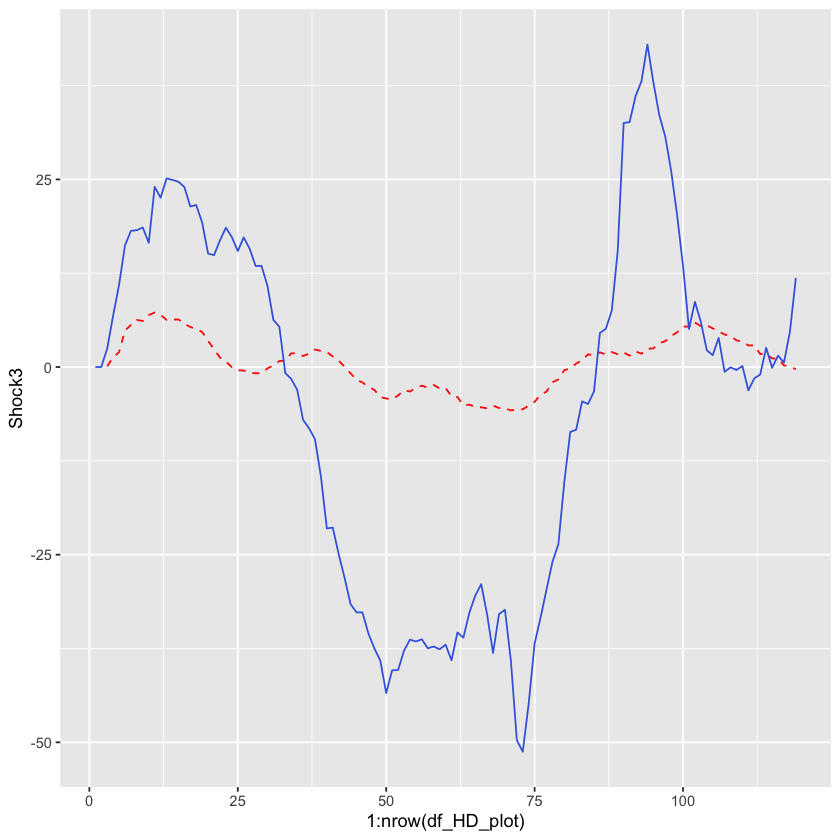

In [48]:
# ## shock3: supply shock
# SVAR_AB_HistDecomp[,c(3,8,13,18,23)]-SVAR_AB_Hist.c0
# ## baseline上 hp 的變化
# (By-SVAR_AB_Hist.c0)[,5]
# ## shock3 對 hp 的衝擊
# (SVAR_AB_HistDecomp[,c(3,8,13,18,23)])[,5]

df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(3,8,13,18,23)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock3")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock3), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### 對「房價」的歷史分解：demand shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2

Warning message:
“Removed 2 row(s) containing missing values (geom_path).”


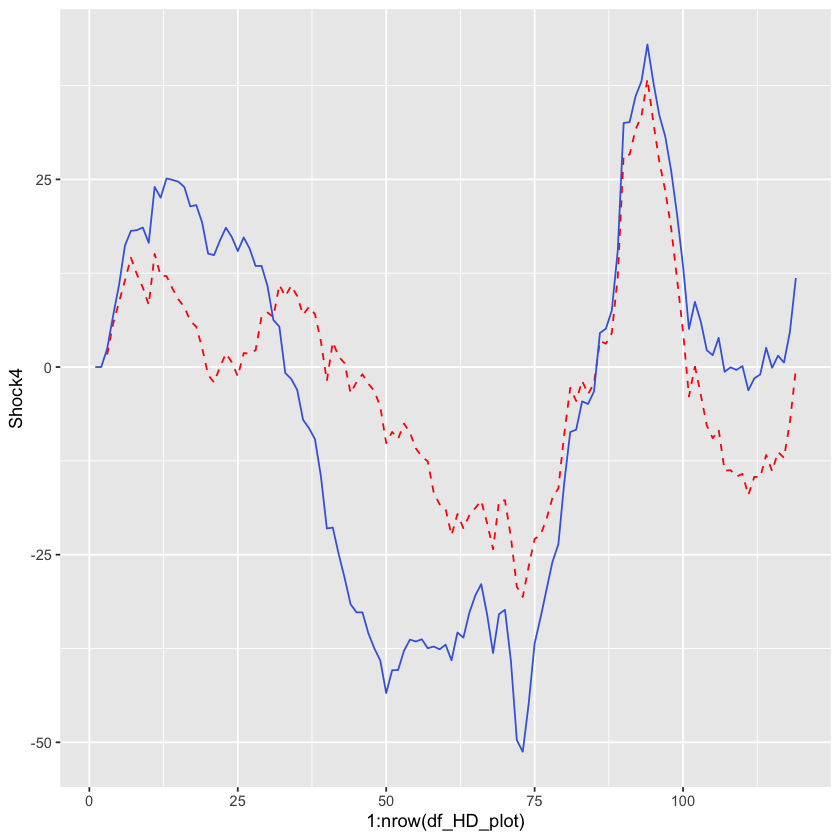

In [47]:
# ## shock4: demand shock
# SVAR_AB_HistDecomp[,c(4,9,14,19,24)]-SVAR_AB_Hist.c0
# ## baseline上 hp 的變化
# (By-SVAR_AB_Hist.c0)[,5]
# ## shock4 對 hp 的衝擊
# (SVAR_AB_HistDecomp[,c(4,9,14,19,24)])[,5]

df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(4,9,14,19,24)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock4")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock4), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### 對「房價」的歷史分解：housing speculation shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2

Warning message:
“Removed 2 row(s) containing missing values (geom_path).”


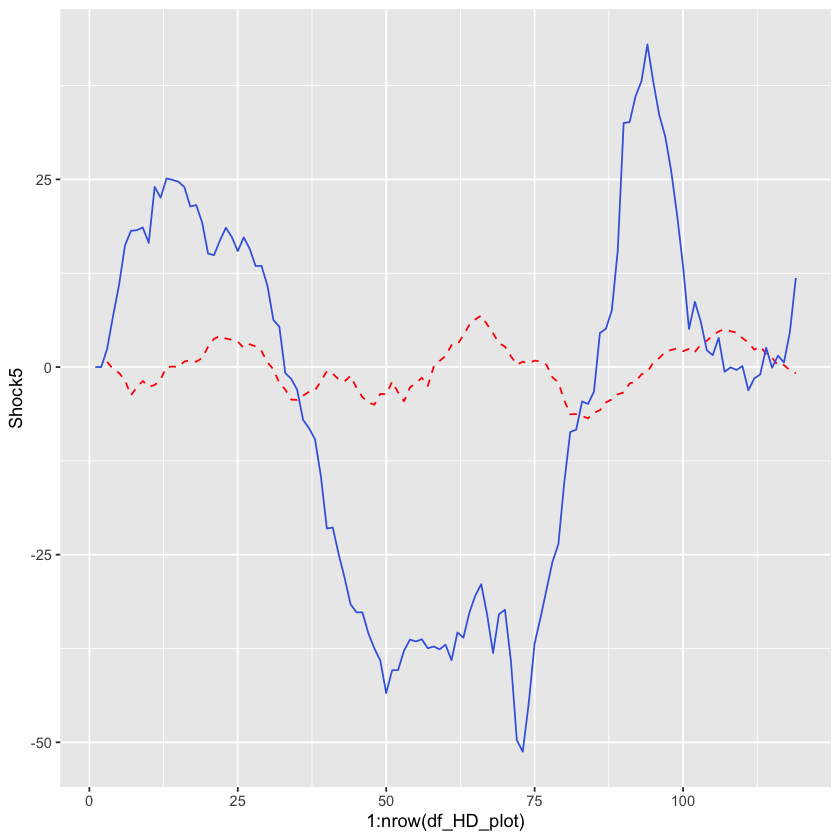

In [46]:
## shock5: housing speculation shock
#SVAR_AB_HistDecomp[,c(5,10,15,20,25)]-SVAR_AB_Hist.c0
## baseline上 hp 的變化
#(By-SVAR_AB_Hist.c0)[,5]
## shock5 對 hp 的衝擊
#(SVAR_AB_HistDecomp[,c(5,10,15,20,25)])[,5]

df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(5,10,15,20,25)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock5")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock5), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')